In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


from feature_engine.outlier_removers import Winsorizer

# for Q-Q plots
import scipy.stats as stats

pd.set_option('display.max_rows',2000)
pd.set_option('display.max_columns',50)
pd.set_option('display.width',1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
trainset = pd.read_csv('trainfilled.csv')

In [3]:
trainset.shape

(1562, 40)

In [4]:
trainset.head()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876,408,24.583,397.410526,18.380,0.945945,0.010761,0.026038,0.005685,0.005635,0.0,0.005935,0.000000,4.172,0.550,0.023,0.107,0.062,0.310,0.166,0.100,0.083326,0.262,0.342,11.022908,5.752414,21.715153,217,3421.828611,2508.303867,0.471,0.218,0.190,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577
1,10224,1166,28.346,3.000000,26.694,0.808959,0.002284,0.173426,0.001803,0.001493,0.0,0.012033,0.000000,7.714,0.545,0.040,0.324,0.201,0.253,0.102,0.066,0.070000,0.200,0.148,9.904099,5.752414,18.260000,181,2009.000000,1690.000000,0.472,0.290,0.077,0.099099,0.202202,0.302302,0.396396,14.482893,3.013219,844
2,27023,2927,21.641,9.000000,31.028,0.956621,0.005141,0.013088,0.004728,0.004708,0.0,0.014809,0.000905,9.789,0.508,0.063,0.129,0.032,0.296,0.215,0.087,0.070000,0.187,0.258,11.011502,5.752414,19.940000,234,4650.000000,1350.000000,0.496,0.208,0.192,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700
3,8735,1039,23.110,0.000000,27.734,0.894835,0.000298,0.076576,0.000995,0.004297,0.0,0.022999,0.000000,13.735,0.545,0.038,0.207,0.084,0.255,0.182,0.104,0.081000,0.169,0.274,12.845770,5.752414,30.310000,231,4420.000000,1749.000000,0.503,0.193,0.215,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592
4,3681,365,21.985,2.000000,19.673,0.923886,0.000496,0.042889,0.000000,0.013622,0.0,0.016905,0.002202,8.217,0.474,0.034,0.177,0.075,0.324,0.118,0.113,0.083326,0.178,0.340,11.565750,5.752414,21.715153,270,3421.828611,1249.000000,0.516,0.222,0.230,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444


In [5]:
trainset.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1.562000e+03,1.562000e+03,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,1.083407e+05,1.490462e+04,28.525570,397.410526,28.537526,0.769045,0.088593,0.092012,0.018431,0.012709,0.000711,0.017583,0.000916,12.182780,0.470535,0.062551,0.220037,0.088844,0.304546,0.211682,0.106566,0.083326,0.164818,0.276981,11.637336,5.752414,21.715153,275.482714,3421.828611,2508.303867,0.499388,0.228672,0.167707,0.145666,0.346271,0.303030,0.205033,11.621356,10.415138,701.142125
std,3.745229e+05,6.255947e+04,8.121601,1353.939638,4.670467,0.203306,0.143505,0.141599,0.074762,0.026693,0.003059,0.015836,0.001657,5.783889,0.070936,0.022615,0.067456,0.041454,0.043522,0.059405,0.022506,0.020435,0.043197,0.053064,1.524285,2.691047,10.047720,57.827540,2443.369163,1887.374524,0.023918,0.034710,0.044527,0.067483,0.071152,0.052236,0.092001,2.756009,2.772070,192.883110
min,2.690000e+02,6.400000e+01,7.279000,-1.000000,9.909000,0.009547,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.186000,0.012000,0.053000,0.018000,0.133000,0.031000,0.033000,0.030000,0.032000,0.104000,7.209413,-0.080000,3.140000,76.000000,340.000000,279.000000,0.314000,0.082000,0.036000,0.019000,0.074297,0.114458,0.064128,3.654080,0.961076,351.000000
25%,1.045275e+04,1.078250e+03,22.874000,6.000000,25.869000,0.649967,0.005523,0.018747,0.001201,0.002391,0.000000,0.009465,0.000000,7.991000,0.425000,0.046000,0.172000,0.059000,0.283000,0.174000,0.092000,0.070000,0.144000,0.243000,10.443252,5.752414,14.935000,233.000000,1919.250000,1429.000000,0.495000,0.208000,0.140000,0.094226,0.300601,0.269461,0.142142,10.014818,8.613691,578.000000
50%,2.528200e+04,2.754000e+03,27.199500,72.500000,28.768000,0.846542,0.020599,0.037613,0.002610,0.005279,0.000000,0.014438,0.000302,11.173500,0.470500,0.061000,0.216000,0.079000,0.306000,0.211682,0.105000,0.080000,0.164818,0.281000,11.884105,5.752414,21.715153,270.000000,2889.500000,2080.000000,0.504000,0.227000,0.164500,0.129388,0.352176,0.303303,0.182365,11.435441,10.396898,650.000000
75%,6.836150e+04,7.987000e+03,32.341500,397.410526,31.307250,0.933479,0.102047,0.092998,0.006121,0.011886,0.000403,0.020999,0.001197,15.018500,0.515000,0.076000,0.265000,0.108750,0.331000,0.240000,0.121750,0.091000,0.182000,0.312000,12.879822,5.752414,26.015000,311.000000,3937.250000,2747.500000,0.511000,0.246000,0.191000,0.187719,0.396556,0.337672,0.241234,12.940235,12.250655,773.750000
max,1.002029e+07,1.760277e+06,73.008000,29251.000000,49.665000,0.995141,0.756011,0.987039,0.815817,0.418088,0.085037,0.184332,0.019582,38.792000,0.996000,0.242000,0.520000,0.327000,0.474000,0.513000,0.180000,0.182000,0.419000,0.446000,14.992477,26.920000,110.450000,511.000000,25169.000000,16740.000000,0.564000,0.415000,0.488000,0.535750,0.535536,0.477341,0.788153,29.034900,24.28115

In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 40 columns):
population                                    1562 non-null int64
renter_occupied_households                    1562 non-null int64
pct_renter_occupied                           1562 non-null float64
evictions                                     1562 non-null float64
rent_burden                                   1562 non-null float64
pct_white                                     1562 non-null float64
pct_af_am                                     1562 non-null float64
pct_hispanic                                  1562 non-null float64
pct_am_ind                                    1562 non-null float64
pct_asian                                     1562 non-null float64
pct_nh_pi                                     1562 non-null float64
pct_multiple                                  1562 non-null float64
pct_other                                     1562 non-null float64
poverty_rate 

### Plot boxplot to see any outliers for each variable

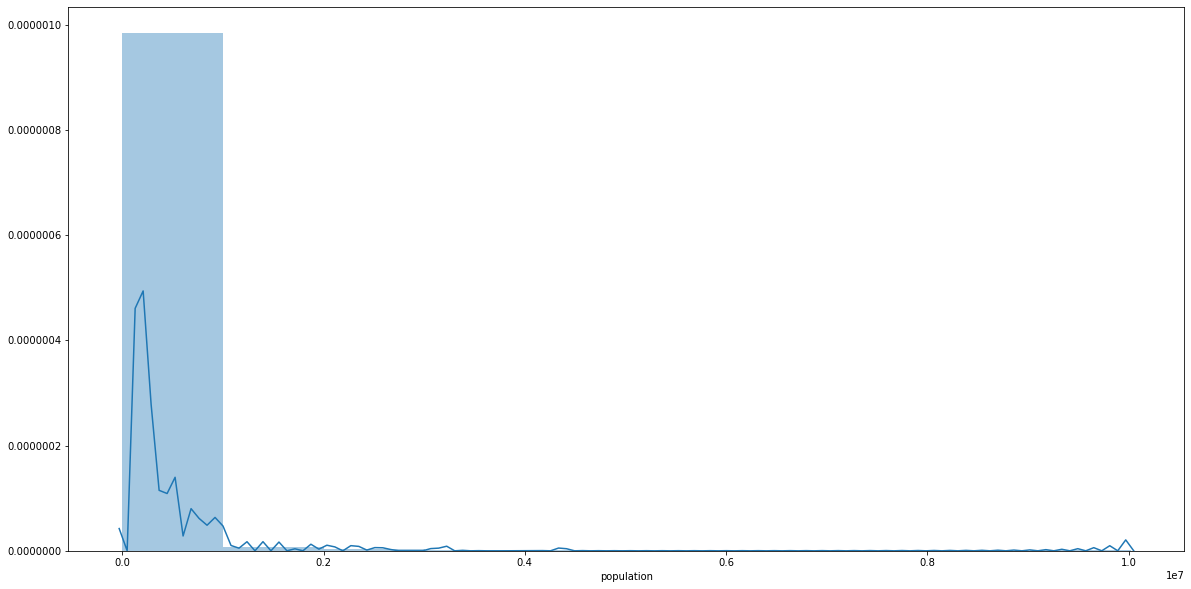

In [7]:
plt.figure(figsize=(20,10))
sns.distplot(trainset.population,bins=10)
plt.show()

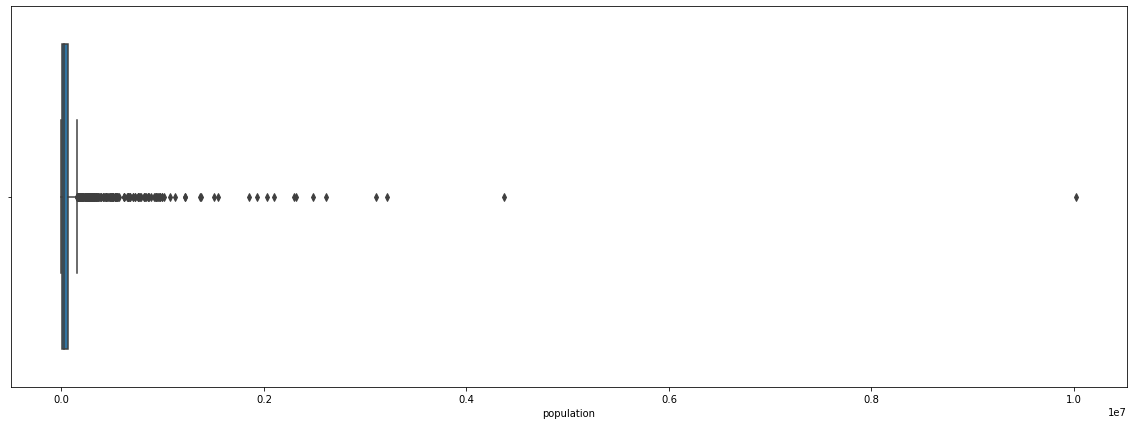

In [8]:
plt.figure(figsize=(20,7))
sns.boxplot(x=trainset.population)
plt.show()

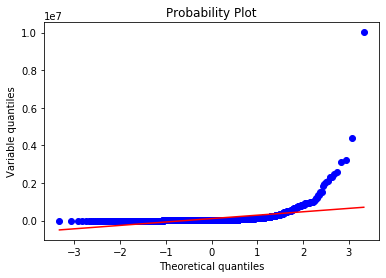

In [9]:
stats.probplot(trainset['population'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

In [10]:
low = trainset['population'].quantile(0.25)
high = trainset['population'].quantile(0.75)
print(low,high)

10452.75 68361.5


In [11]:
interquantile_range = high - low
print(interquantile_range)

57908.75


In [12]:
lower_boundary = low - (interquantile_range*1.5)
upper_boundary = high + (interquantile_range*1.5)
print(lower_boundary)
print(upper_boundary)

-76410.375
155224.625


### Use Feature Engine to start clipping outliers using IQR

In [13]:
windsoriser = Winsorizer(distribution='skewed', tail='both', fold=1.5, variables=None)

In [14]:
windsoriser.fit(trainset)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['population', 'renter_occupied_households',
                      'pct_renter_occupied', 'evictions', 'rent_burden',
                      'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind',
                      'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other',
                      'poverty_rate', 'pct_civilian_labor', 'pct_unemployment',
                      'pct_uninsured_adults', 'pct_uninsured_children',
                      'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes',
                      'pct_low_birthweight', 'pct_excessive_drinking',
                      'pct_physical_inactivity',
                      'air_pollution_particulate_matter_value',
                      'homicides_per_100k',
                      'motor_vehicle_crash_deaths_per_100k',
                      'heart_disease_mortality_per_100k', 'pop_per_dentist',
                      'pop_per_primary_care_physici

In [15]:
trainset_new = windsoriser.transform(trainset)

In [16]:
trainset_new

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
0,3876.000,408.000,24.58300,397.410526,18.380000,0.945945,0.010761,0.026038,0.005685,0.005635,0.000000,0.005935,0.000000,4.17200,0.550,0.023,0.107000,0.062000,0.310000,0.166000,0.100000,0.083326,0.239000,0.342000,11.022908,5.752414,21.715153,217.0,3421.828611,2508.303867,0.471000,0.218000,0.190000,0.083250,0.327984,0.389168,0.199599,10.008982,9.752342,577.000
1,10224.000,1166.000,28.34600,3.000000,26.694000,0.808959,0.002284,0.173426,0.001803,0.001493,0.000000,0.012033,0.000000,7.71400,0.545,0.040,0.324000,0.183375,0.253000,0.102000,0.066000,0.070000,0.200000,0.148000,9.904099,5.752414,18.260000,181.0,2009.000000,1690.000000,0.472000,0.290000,0.077000,0.099099,0.202202,0.302302,0.389872,14.482893,3.158246,844.000
2,27023.000,2927.000,21.64100,9.000000,31.028000,0.956621,0.005141,0.013088,0.004728,0.004708,0.000000,0.014809,0.000905,9.78900,0.508,0.063,0.129000,0.032000,0.296000,0.215000,0.087000,0.070000,0.187000,0.258000,11.011502,5.752414,19.940000,234.0,4650.000000,1350.000000,0.496000,0.208000,0.192000,0.137725,0.387226,0.255489,0.219561,9.620346,10.873572,700.000
3,8735.000,1039.000,23.11000,0.000000,27.734000,0.894835,0.000298,0.076576,0.000995,0.004297,0.000000,0.022999,0.000000,13.73500,0.545,0.038,0.207000,0.084000,0.255000,0.182000,0.104000,0.081000,0.169000,0.274000,12.845770,5.752414,30.310000,231.0,4420.000000,1749.000000,0.503000,0.193000,0.215000,0.077154,0.308617,0.398798,0.215431,9.383225,10.870809,592.000
4,3681.000,365.000,21.98500,2.000000,19.673000,0.923886,0.000496,0.042889,0.000000,0.013622,0.000000,0.016905,0.002202,8.21700,0.474,0.034,0.177000,0.075000,0.324000,0.118000,0.113000,0.083326,0.178000,0.340000,11.565750,5.752414,21.715153,270.0,3421.828611,1249.000000,0.516000,0.222000,0.230000,0.092537,0.362189,0.346269,0.199005,9.543286,14.723926,444.000
5,8540.000,751.000,22.54300,0.000000,34.937000,0.560637,0.246833,0.000597,0.001294,0.000000,0.000000,0.019925,0.000000,21.05100,0.361,0.110,0.246000,0.100000,0.322000,0.211682,0.148000,0.122500,0.164818,0.317000,12.822859,5.752414,39.160000,388.0,3421.828611,4725.250000,0.515000,0.199000,0.185000,0.317000,0.388000,0.198000,0.097000,10.456274,14.139734,531.000
6,22712.000,1901.000,24.60200,19.000000,29.242000,0.929799,0.005564,0.039416,0.002389,0.005106,0.000000,0.016234,0.001493,9.65100,0.470,0.061,0.258000,0.126000,0.275000,0.294000,0.108000,0.070000,0.239000,0.231000,13.395494,5.752414,26.490000,254.0,2500.000000,1489.000000,0.494000,0.218000,0.162000,0.142572,0.287139,0.292124,0.278166,10.953481,6.818432,976.000
7,27974.000,3873.000,38.01200,49.000000,29.966000,0.537084,0.008489,0.204374,0.013501,0.024534,0.001007,0.013473,0.000000,15.65500,0.462,0.106,0.297000,0.117000,0.267000,0.150000,0.078000,0.050000,0.169000,0.188000,8.035606,5.752414,20.630000,239.0,1410.000000,4725.250000,0.497000,0.278000,0.141000,0.249004,0.293825,0.307769,0.149402,14.526719,9.660626,725.000
8,2027.000,295.000,46.54275,397.410526,21.808000,0.224700,0.001981,0.010408,0.013501,0.000000,0.001007,0.036758,0.000000,25.55975,0.353,0.077,0.316000,0.086000,0.403000,0.339000,0.166375,0.070000,0.239000,0.384000,10.904799,5.752414,21.715153,428.0,670.000000,1980.000000,0.500000,0.303000,0.075000,0.18

In [17]:
trainset_new.describe()

,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,poverty_rate,pct_civilian_labor,pct_unemployment,pct_uninsured_adults,pct_uninsured_children,pct_adult_obesity,pct_adult_smoking,pct_diabetes,pct_low_birthweight,pct_excessive_drinking,pct_physical_inactivity,air_pollution_particulate_matter_value,homicides_per_100k,motor_vehicle_crash_deaths_per_100k,heart_disease_mortality_per_100k,pop_per_dentist,pop_per_primary_care_physician,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1.562000e+03,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,49114.225672,5682.920855,28.314262,218.579743,28.517017,0.770633,0.067198,0.066712,0.004483,0.008505,0.000272,0.016060,0.000754,12.025481,0.469967,0.062230,0.219656,0.087863,0.305049,0.210151,0.106540,0.082519,0.163727,0.277053,11.637336,5.752414e+00,21.413277,275.154930,3194.120384,2280.069873,0.501964,0.228032,0.166945,0.145006,0.346525,0.303117,0.200967,11.539758,10.406163,690.869398
std,52350.312542,6284.298513,7.432344,280.348295,4.401403,0.198506,0.086364,0.065213,0.004490,0.008415,0.000379,0.009269,0.000956,5.290549,0.067345,0.021321,0.066185,0.038427,0.040905,0.054311,0.022327,0.018199,0.037713,0.052664,1.524285,8.085012e-14,9.009956,56.639382,1639.713168,1109.723035,0.014393,0.031623,0.041844,0.065225,0.070378,0.051584,0.079608,2.451829,2.727474,161.102958
min,269.000000,64.000000,8.672750,-1.000000,17.711625,0.224700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.290000,0.012000,0.053000,0.018000,0.211000,0.075000,0.047375,0.038500,0.087000,0.139500,7.209413,5.752414e+00,3.140000,116.000000,340.000000,279.000000,0.471000,0.151000,0.063500,0.019000,0.156669,0.167145,0.064128,5.626693,3.158246,351.000000
25%,10452.750000,1078.250000,22.874000,6.000000,25.869000,0.649967,0.005523,0.018747,0.001201,0.002391,0.000000,0.009465,0.000000,7.991000,0.425000,0.046000,0.172000,0.059000,0.283000,0.174000,0.092000,0.070000,0.144000,0.243000,10.443252,5.752414e+00,14.935000,233.000000,1919.250000,1429.000000,0.495000,0.208000,0.140000,0.094226,0.300601,0.269461,0.142142,10.014818,8.613691,578.000000
50%,25282.000000,2754.000000,27.199500,72.500000,28.768000,0.846542,0.020599,0.037613,0.002610,0.005279,0.000000,0.014438,0.000302,11.173500,0.470500,0.061000,0.216000,0.079000,0.306000,0.211682,0.105000,0.080000,0.164818,0.281000,11.884105,5.752414e+00,21.715153,270.000000,2889.500000,2080.000000,0.504000,0.227000,0.164500,0.129388,0.352176,0.303303,0.182365,11.435441,10.396898,650.000000
75%,68361.500000,7987.000000,32.341500,397.410526,31.307250,0.933479,0.102047,0.092998,0.006121,0.011886,0.000403,0.020999,0.001197,15.018500,0.515000,0.076000,0.265000,0.108750,0.331000,0.240000,0.121750,0.091000,0.182000,0.312000,12.879822,5.752414e+00,26.015000,311.000000,3937.250000,2747.500000,0.511000,0.246000,0.191000,0.187719,0.396556,0.337672,0.241234,12.940235,12.250655,773.750000
max,155224.625000,18350.125000,46.542750,984.526316,39.464625,0.995141,0.246833,0.204374,0.013501,0.026130,0.001007,0.038300,0.002992,25.559750,0.650000,0.121000,0.404500,0.183375,0.403000,0.339000,0.166375,0.122500,0.239000,0.415500,14.992477,5.752414e+00,42.635000,428.000000,6964.250000,4725.250000,0.535000,0.303000,0.267500,0.327959,0.535536,0.439989,0.389872,17.3283

In [18]:
windsoriser.left_tail_caps_

{'population': -76410.375,
 'renter_occupied_households': -9284.875,
 'pct_renter_occupied': 8.672750000000002,
 'evictions': -581.1157894736842,
 'rent_burden': 17.711624999999994,
 'pct_white': 0.22469963037500007,
 'pct_af_am': -0.139263134125,
 'pct_hispanic': -0.09262837674999999,
 'pct_am_ind': -0.006178134375000001,
 'pct_asian': -0.011852243124999998,
 'pct_nh_pi': -0.000604464,
 'pct_multiple': -0.007836215874999993,
 'pct_other': -0.001795441125,
 'poverty_rate': -2.550250000000003,
 'pct_civilian_labor': 0.2899999999999999,
 'pct_unemployment': 0.0010000000000000009,
 'pct_uninsured_adults': 0.032499999999999946,
 'pct_uninsured_children': -0.015625,
 'pct_adult_obesity': 0.21100000000000005,
 'pct_adult_smoking': 0.07499999999999998,
 'pct_diabetes': 0.047375,
 'pct_low_birthweight': 0.03850000000000002,
 'pct_excessive_drinking': 0.08700000000000005,
 'pct_physical_inactivity': 0.13949999999999999,
 'air_pollution_particulate_matter_value': 6.788397789999997,
 'homicides_p

In [19]:
windsoriser.right_tail_caps_

{'population': 155224.625,
 'renter_occupied_households': 18350.125,
 'pct_renter_occupied': 46.54274999999999,
 'evictions': 984.5263157894738,
 'rent_burden': 39.46462500000001,
 'pct_white': 1.358746997375,
 'pct_af_am': 0.24683305287500001,
 'pct_hispanic': 0.20437379125,
 'pct_am_ind': 0.013500614625,
 'pct_asian': 0.026129525875,
 'pct_nh_pi': 0.00100744,
 'pct_multiple': 0.03829985712499999,
 'pct_other': 0.002992401875,
 'poverty_rate': 25.55975,
 'pct_civilian_labor': 0.65,
 'pct_unemployment': 0.121,
 'pct_uninsured_adults': 0.4045000000000001,
 'pct_uninsured_children': 0.183375,
 'pct_adult_obesity': 0.403,
 'pct_adult_smoking': 0.33899999999999997,
 'pct_diabetes': 0.166375,
 'pct_low_birthweight': 0.12249999999999998,
 'pct_excessive_drinking': 0.23899999999999996,
 'pct_physical_inactivity': 0.4155,
 'air_pollution_particulate_matter_value': 16.534676250000004,
 'homicides_per_100k': 5.75241435562806,
 'motor_vehicle_crash_deaths_per_100k': 42.635000000000005,
 'heart_di

### Check affected features after outlier treatment

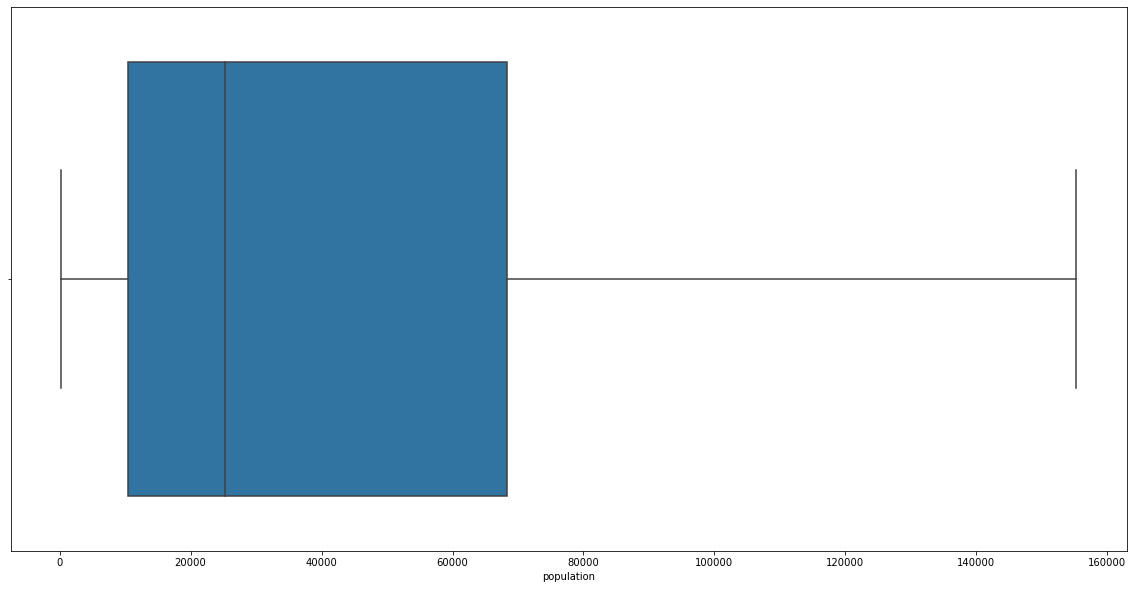

In [20]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.population)
plt.show()

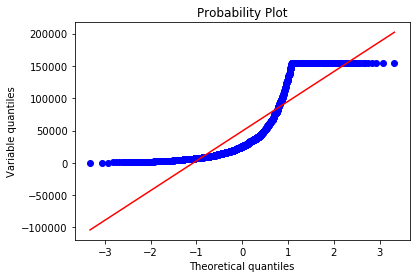

In [21]:
stats.probplot(trainset_new['population'],dist='norm',plot=plt)
plt.ylabel('Variable quantiles')
plt.show()

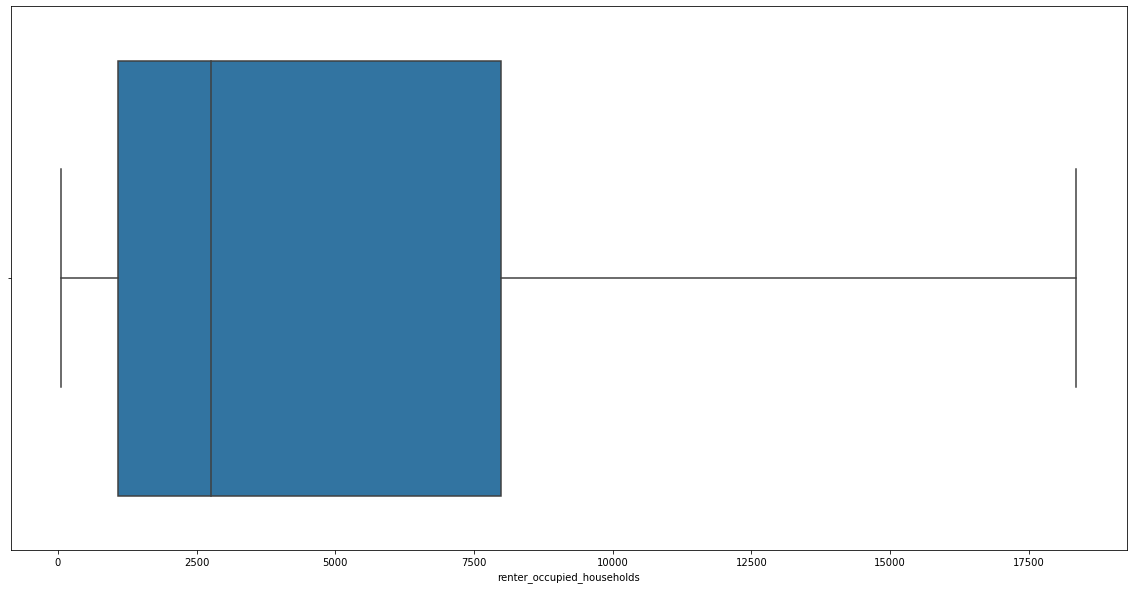

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.renter_occupied_households)
plt.show()

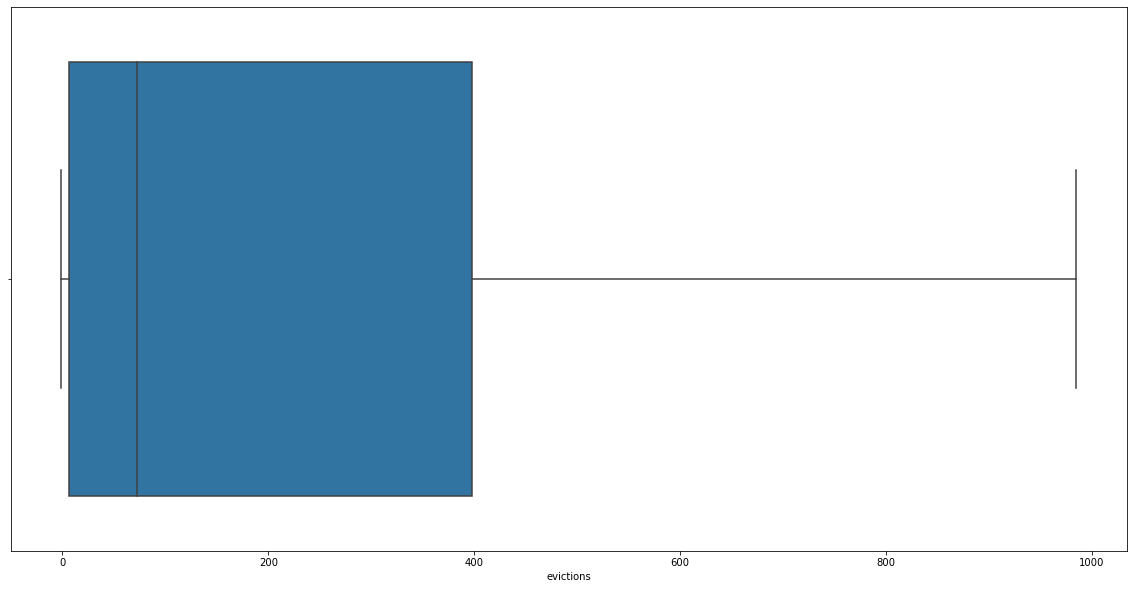

In [23]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.evictions)
plt.show()

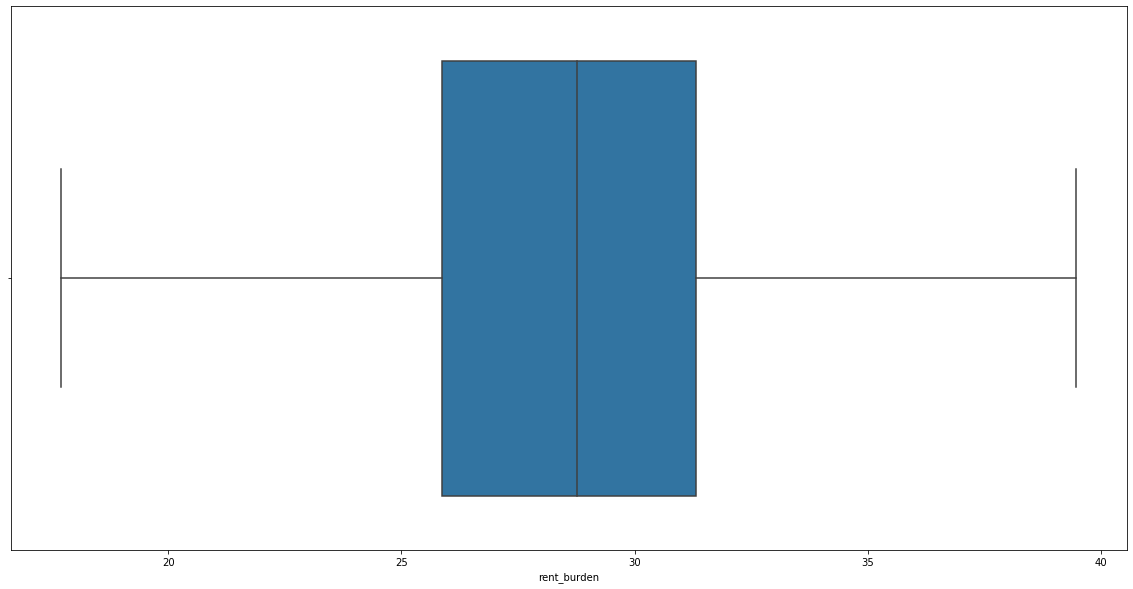

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.rent_burden)
plt.show()

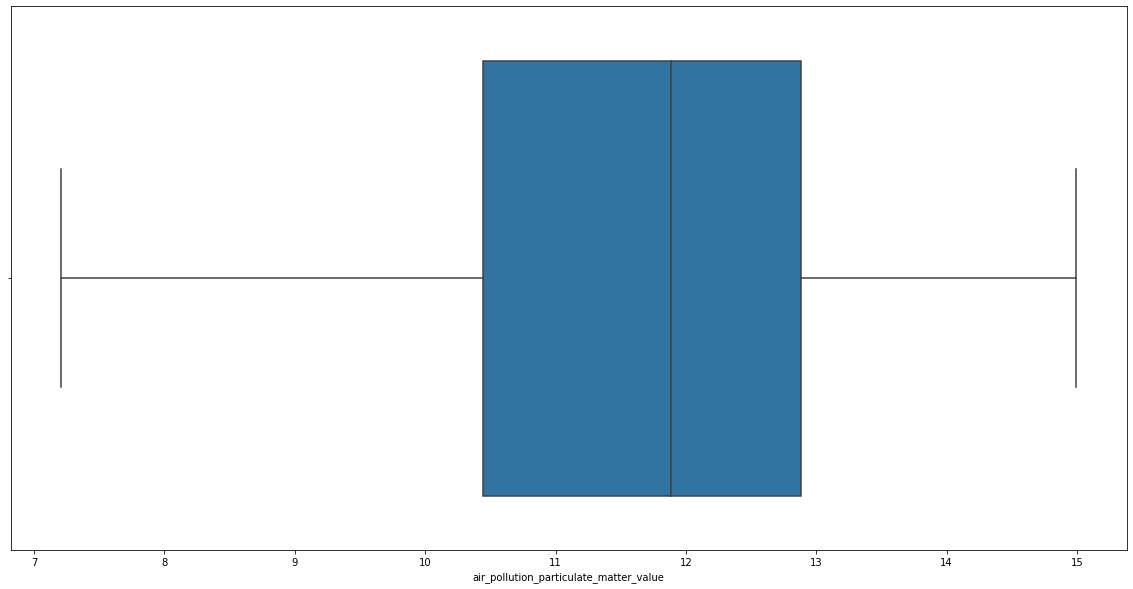

In [25]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.air_pollution_particulate_matter_value)
plt.show()

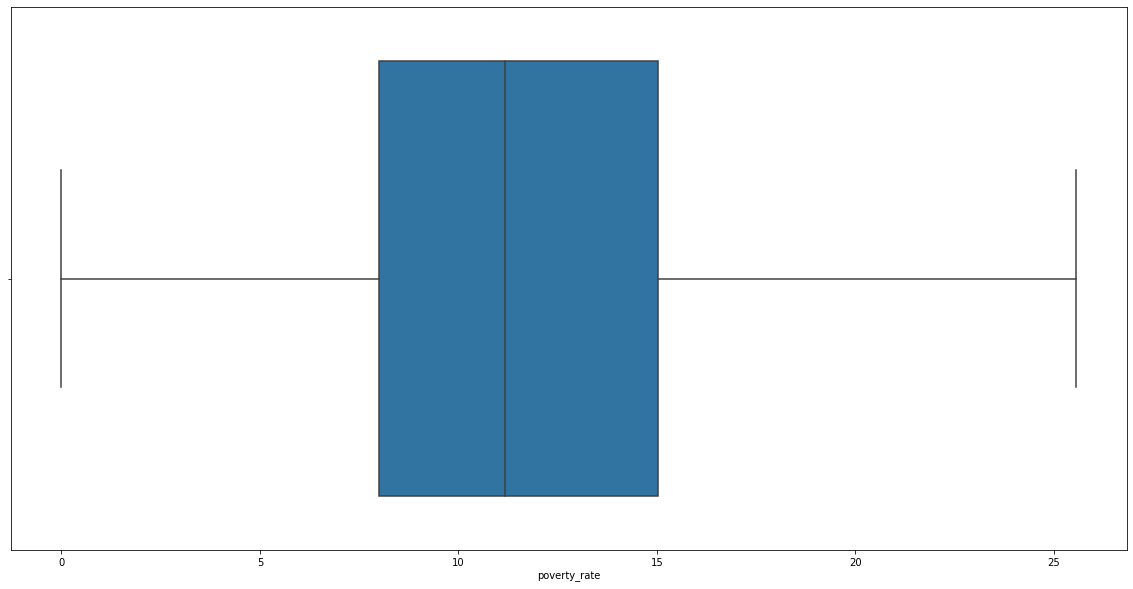

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.poverty_rate)
plt.show()

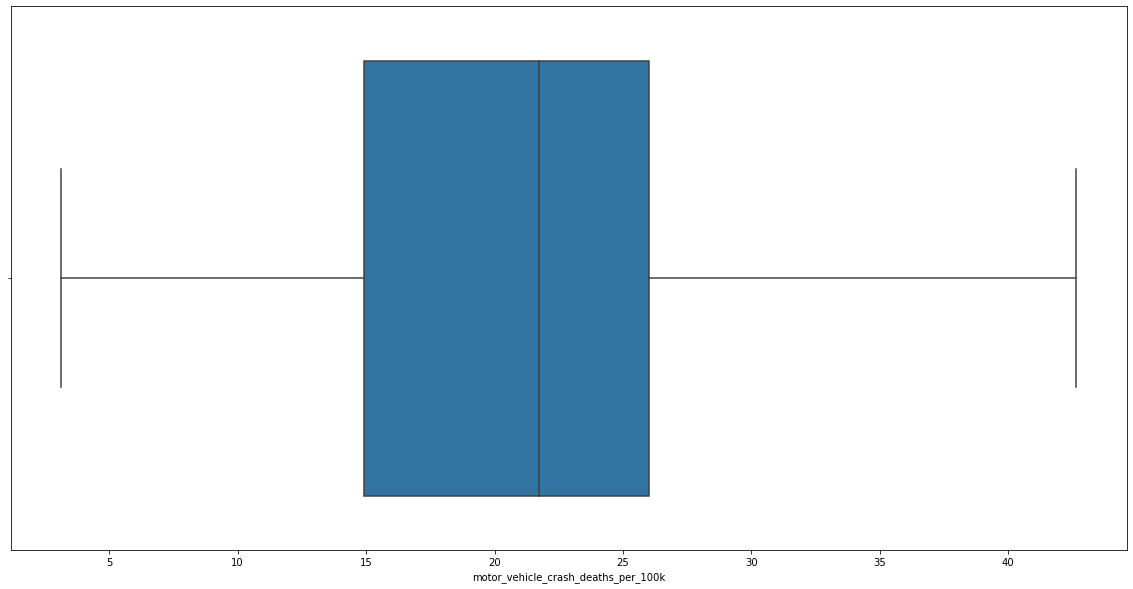

In [27]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.motor_vehicle_crash_deaths_per_100k)
plt.show()

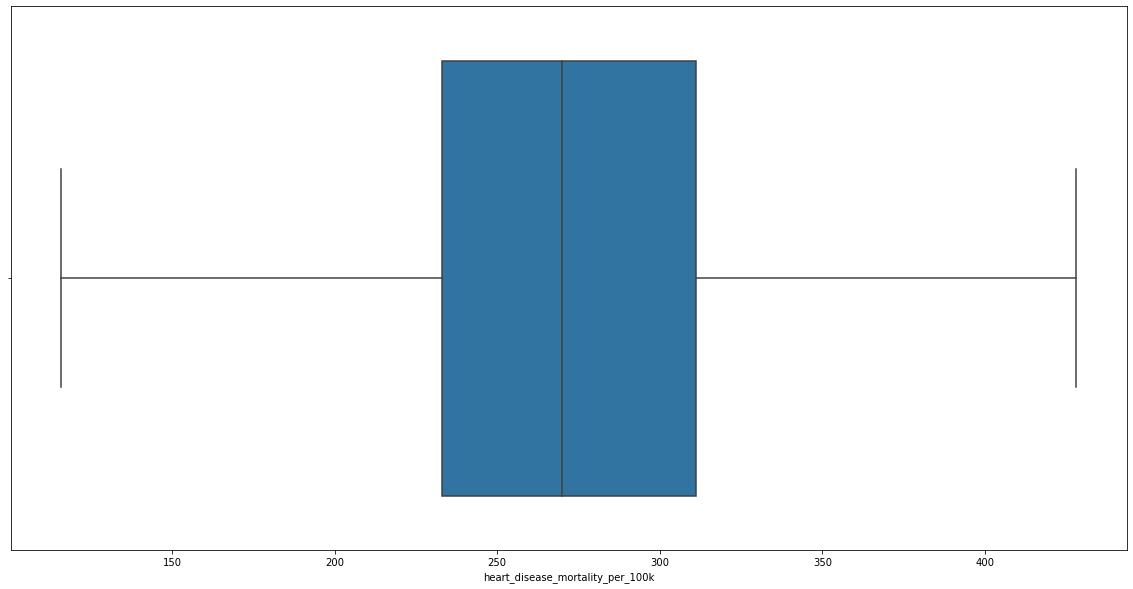

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.heart_disease_mortality_per_100k)
plt.show()

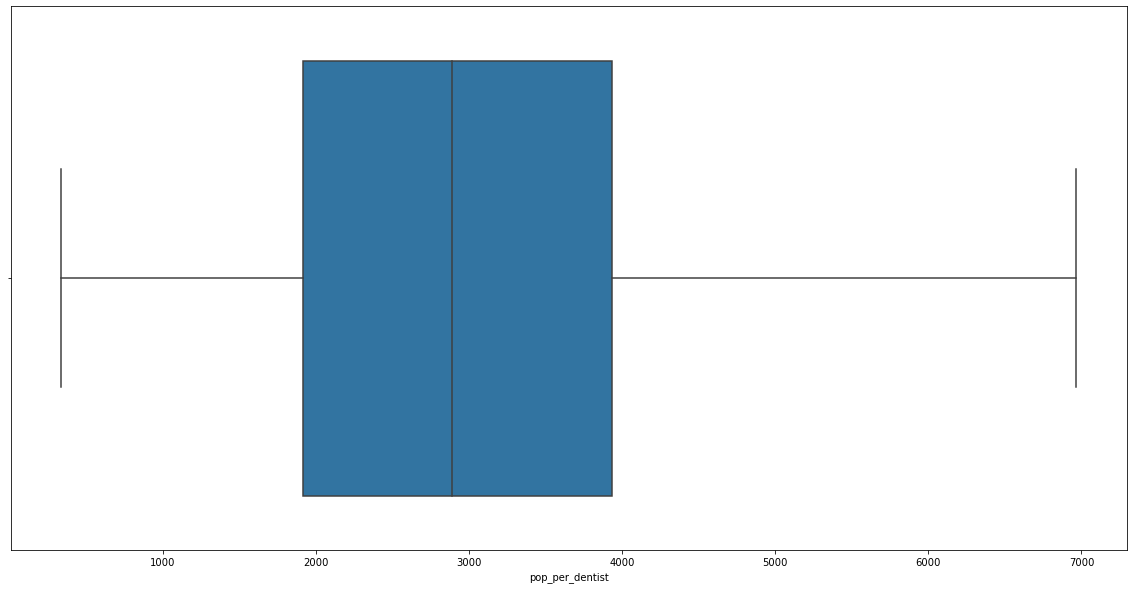

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.pop_per_dentist)
plt.show()

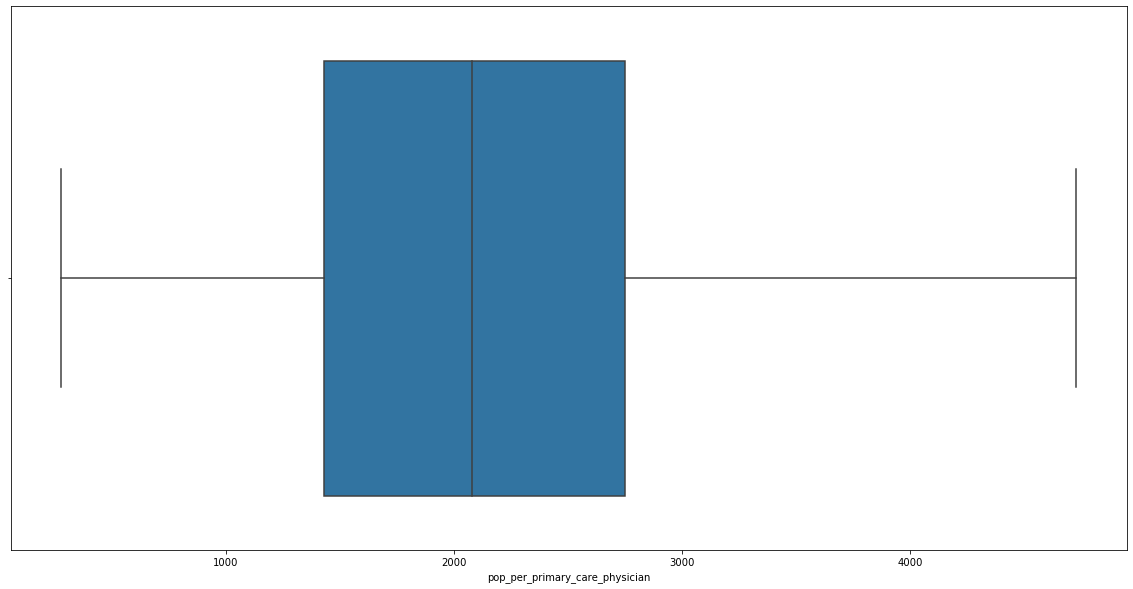

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.pop_per_primary_care_physician)
plt.show()

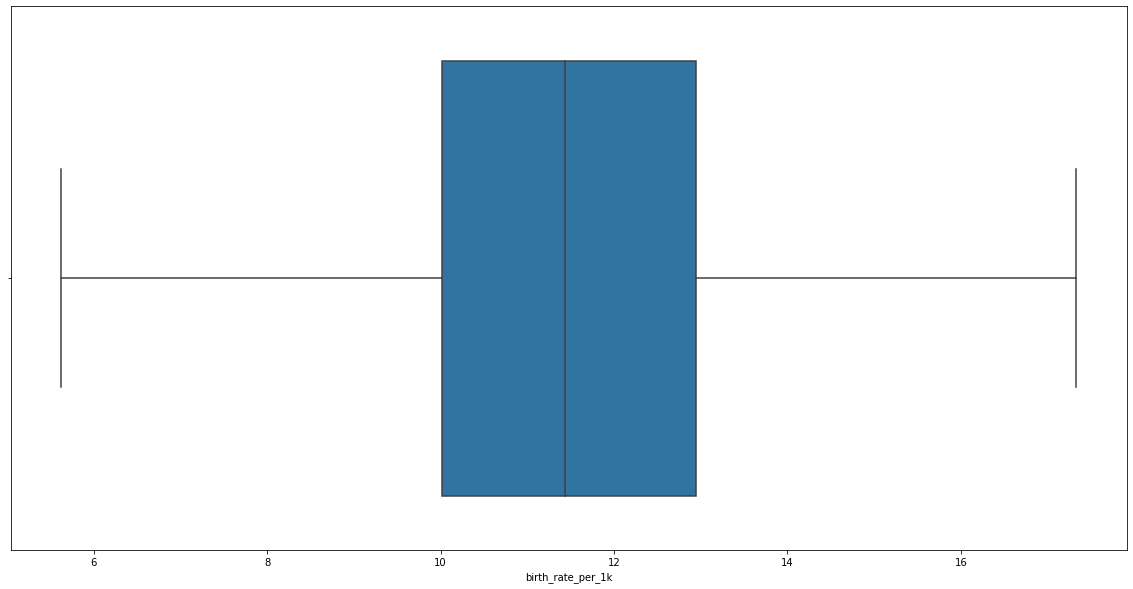

In [31]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.birth_rate_per_1k)
plt.show()

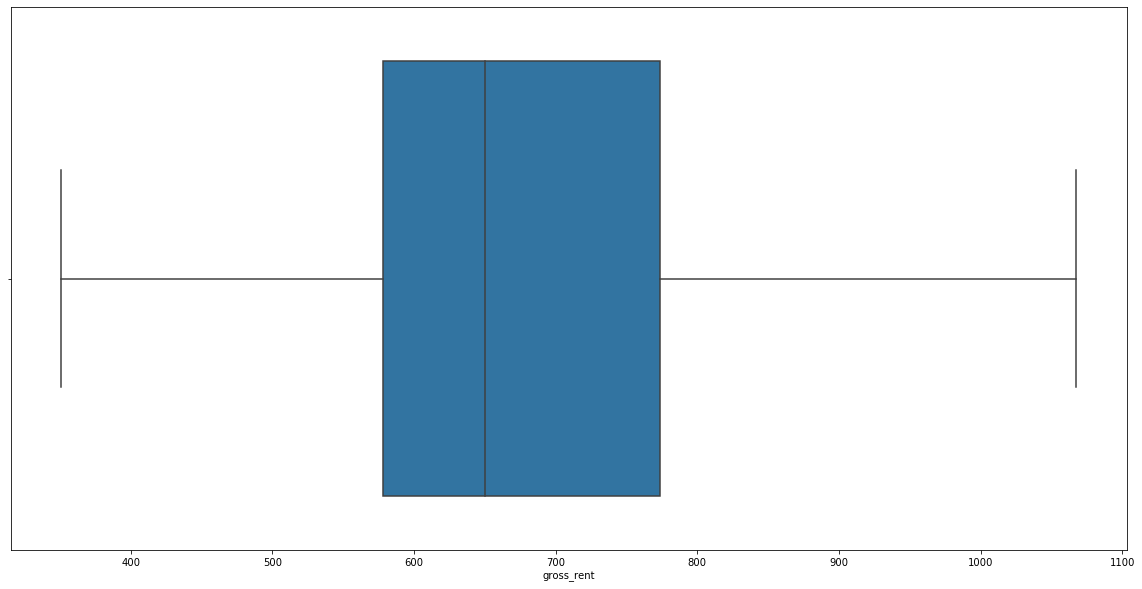

In [32]:
plt.figure(figsize=(20,10))
sns.boxplot(x=trainset_new.gross_rent)
plt.show()

In [33]:
#trainset_new.to_csv('trainoutlier.csv',index=False)